In [ ]:
library(dplyr)
require(ggplot2)
require(reshape2)
require(tidyverse)
library('ggplot2')
library('latex2exp')
library("gridExtra")
library(DescTools)

### Exercise 1


The probability distribution of y, the number of times the method fails, that we call success of probability p, will be given by a Binomial distribution:
$$p(y|p, n)={n \choose y}{p^y}{(1-p)^{n-y}}$$
The frequentist estimator is $ p=\frac{\text{# of succes}}{\text{# of trials}}=\frac{6}{75}=0.08 $

the null hipothesis: the p>=0.15
scelgo di plottare per la frequentist la cumulativa perchè se ottengo un numero di fallimenti inferiori allora posso pensare che il test sia migliore cioè scartare l'ipotesi nulla.
The null hypothesis is $H_0: P \geq 0.15$



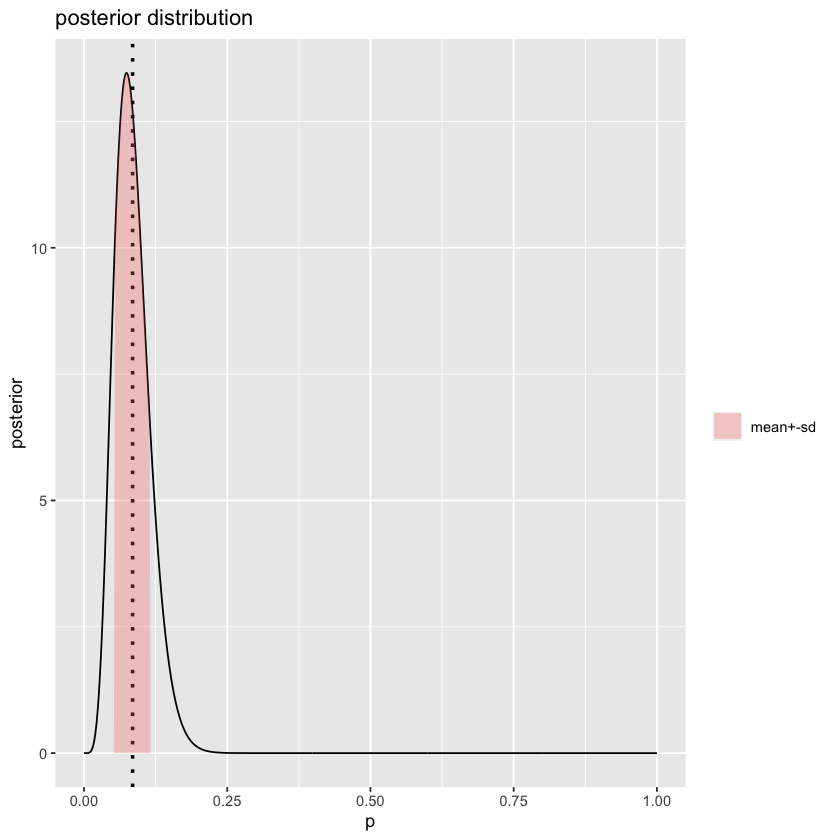

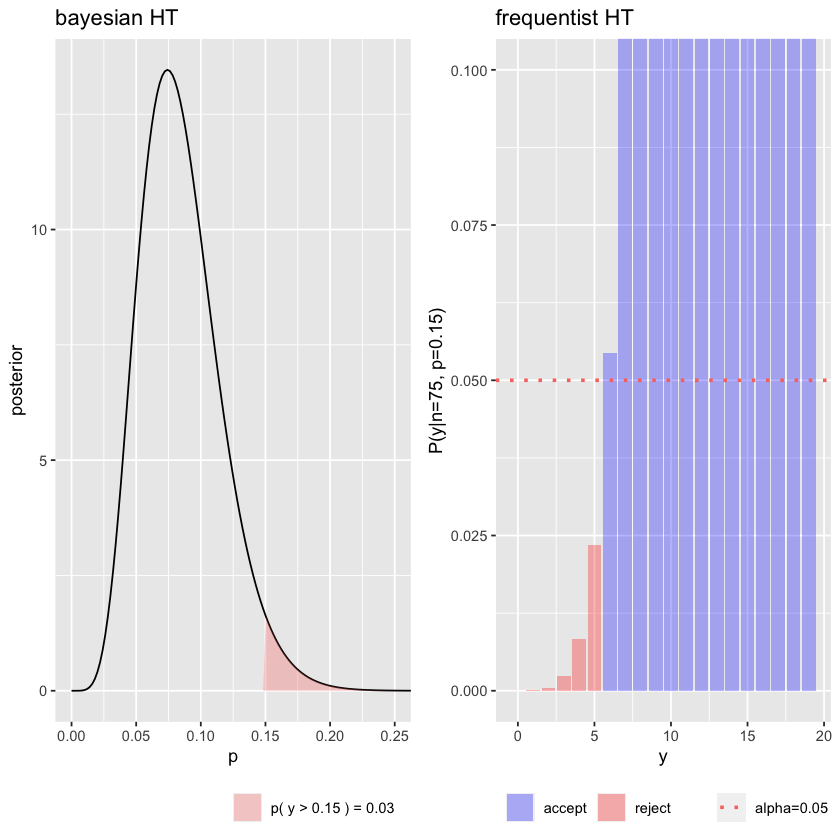

In [42]:
n<-75
r<-6 
f <- r/n

mu <- 0.15
sigma <- 0.14
var <- sigma^2

alpha <- (mu*(mu*(1-mu)/var-1))
beta <- (1-mu)*(mu*(1-mu)/var-1)

p <- seq(0,1,len=500)

alpha1 <- r+alpha
beta1 <- n-r+beta


post_mean <- alpha1 / (alpha1+beta1)
post_var <- alpha1 * beta1 / ((alpha1+beta1)^2*(alpha1+beta1+1))
post_sd <- sqrt(post_var)


likelihood <- dbinom(x=r, p=p, size=n)
prior_b <-dbeta(x=p, shape1=alpha, shape2=beta)
norm_b<-integrate(dbeta, lower=0, upper=1, shape1=alpha1, shape2=beta1)$value
posteriorF_b<-function(p){return(dbeta(x=p, shape1=alpha1, shape2=beta1 )/norm_b)}
posterior_b <- posteriorF_b(p)

ggplot()+
geom_line(aes(x=p, y=posterior_b))+
geom_vline(xintercept = post_mean, linetype="dotted", size=1)+
geom_area(aes( x =p, y=ifelse(p>post_mean-post_sd & p< post_mean+post_sd, posterior_b, 0), fill='mean+-sd'), alpha=0.3)+
ylim(0, max(posterior_b))+
labs(title='posterior distribution', y='posterior', fill='')


P <- integrate(posteriorF_b, lower=0.15, upper=1)$value

plot1 <- ggplot()+
geom_line(aes(x=p, y=posterior_b))+
geom_area(aes( x = p, y=ifelse(p>0.15, posterior_b, 0), fill=sprintf('p( y > 0.15 ) = %.2f ' , P)), alpha=0.3)+
coord_cartesian(xlim=c(0,0.25))+
labs(fill='', colour='', title='bayesian HT', y='posterior') +
theme(
legend.position="bottom",
legend.justification = c("right", "top"))

trials <- seq(0, n, len=n+1)


alpha <- pbinom(q=6, size=n, prob=0.15)
lower <- qbinom(p=0.95, size=n, prob=0.15)


plot2 <- ggplot() +
geom_bar(aes(x=trials[1:20], y=pbinom(q=trials, size=n, prob=0.15)[1:20], , fill=(trials[1:20] <= 5)), stat = "identity")+
geom_hline(aes(yintercept = 0.05, color='alpha=0.05'), linetype="dotted", size=1)+
scale_fill_manual(values = alpha(c("blue", "red"), .3), labels=c('accept', 'reject'))  +
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
coord_cartesian(ylim=c(0,0.1))+
labs(title='frequentist HT', y='P(y|n=75, p=0.15)', fill='', color='', x='y')


grid.arrange(plot1, plot2, ncol=2)

In the bayesian approach, since we get a p-value=0.03 $<\alpha=0.05$ we reject the null hypothesis.
On the other hand, in the frequentist approach we get that y=6 is in the acceptance region.

### Exercise 2

lambda= 0.663

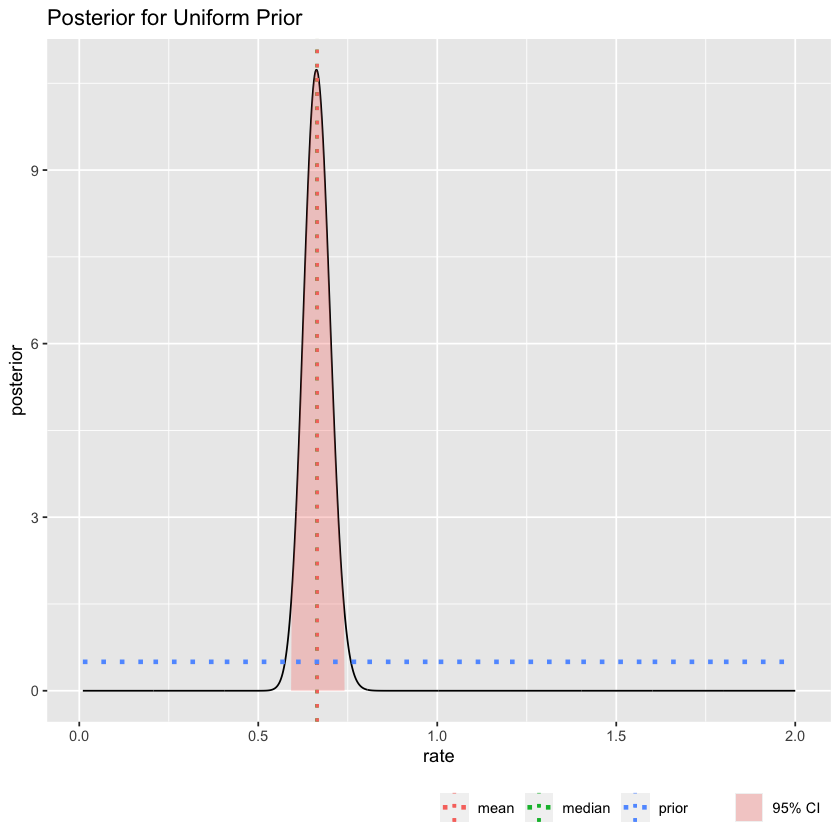

lambda= 0.661

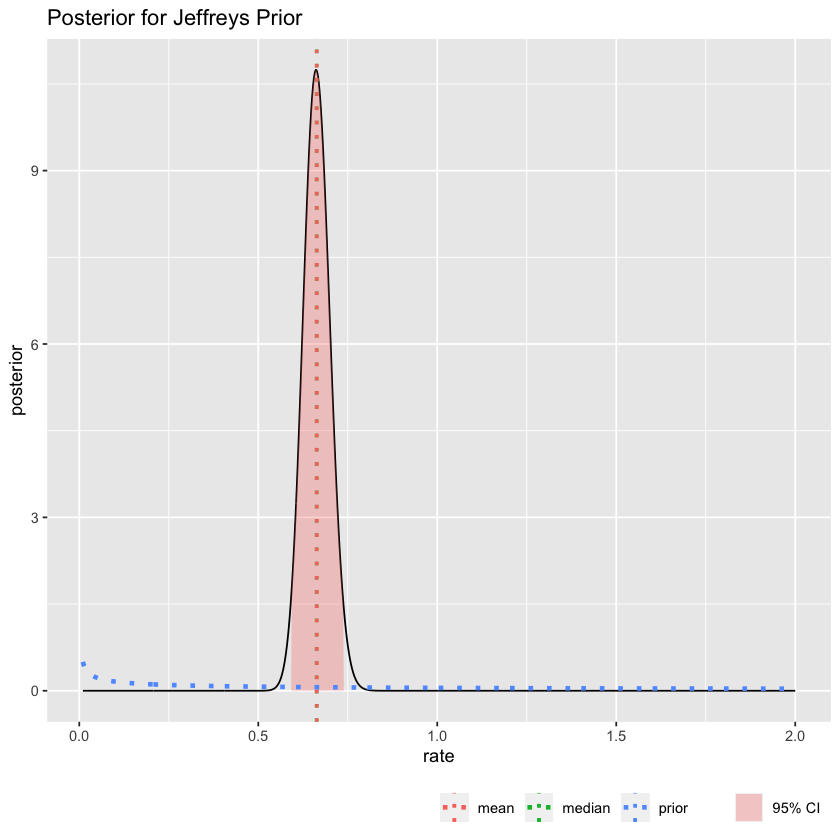

In [43]:
death <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)


data <- death*n1+death*n2
n <- sum(n1)+sum(n2)
alphas<- c(sum(data)+1, sum(data)+1/2)

rate <- seq(0.01, 2, len=1000)
priors <- rbind(dunif(rate, min=0, max=2), 1/(20*sqrt(rate)))
title <-c('Posterior for Uniform Prior', 
         'Posterior for Jeffreys Prior')




for (i in 1:2) {
    
posterior <- dgamma(x=rate, shape=alphas[i], rate=n)
min <- qgamma(p=0.025, shape=alphas[i], rate=n)
max <- qgamma(p=0.975, shape=alphas[i], rate=n)



mean.Th <- alphas[i]/n
variance.Th <- alphas[i]/n^2
median <-qgamma(p=0.5, shape=alphas[i], rate=n)

plot1 <- ggplot()+geom_line(aes(x=rate, y=posterior))+
geom_area(aes(x = rate,
          y=ifelse(rate>min & rate<max, posterior, 0), fill='95% CI'), alpha=0.3)+
ylim(0, max(posterior))+
geom_vline(aes(xintercept = median, color='median'), linetype="dotted", size=1)+
geom_vline(aes(xintercept = mean.Th, color='mean'), linetype="dotted", size=1)+
geom_line(aes(x=rate, y=priors[i, ], color='prior'), linetype='dotted', size=1.3)+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
labs(fill='', colour='', title=title[i])
    
print(plot1)
map = rate[which.max(posterior)]
cat(sprintf('lambda= %.3f', map))
}

    


### Exercise 3
#### first run of  the experiment


	Exact binomial test

data:  r and n
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


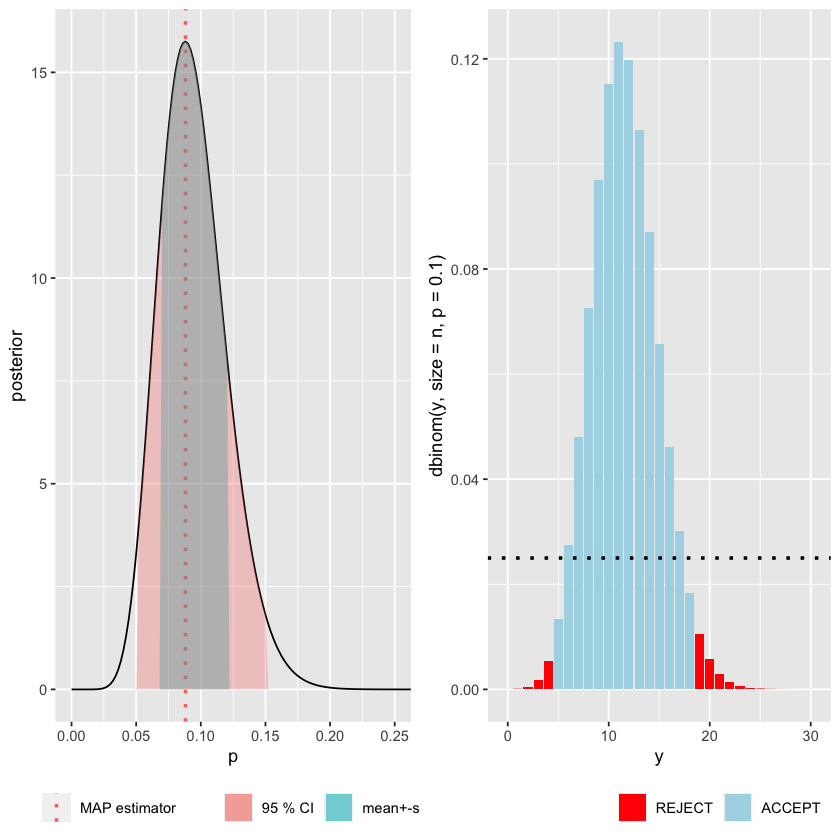

In [44]:
#first experiment
n<-116
r<-11 
p_frequentist <- 11/116


alpha <- 1
beta <- 10

alpha1 <- r+alpha
beta1 <- n-r+beta
mean <- alpha1 / (alpha1 + beta1)
var <- (alpha1*beta1)/((alpha1+beta1)^2*(alpha1+beta1+1))
sd <- sqrt(var)

p <- seq(0,1,len=500)
likelihood <- dbinom(x=r, p=p, size=n)
prior <- dbeta(x=p, shape1=alpha, shape2=beta)
posterior <- dbeta(x=p, shape1=alpha1, shape2=beta1)
map <- p[which.max(posterior)]
lower<-qbeta(p=0.025, shape1=alpha1, shape2=beta1)
upper<-qbeta(p=0.975, shape1=alpha1, shape2=beta1)

plot1 <- ggplot()+
geom_line(aes(x=p, y=posterior))+
geom_vline(aes(xintercept = map, color='MAP estimator'), linetype="dotted", size=1)+
geom_area(aes( x =p, y=ifelse(p>mean-sd & p< mean+sd, posterior, 0), fill='mean+-sd'), alpha=0.4)+
geom_area(aes( x =p, y=ifelse(p>lower & p< upper, posterior, 0), fill='95 % CI'), alpha=0.3)+
labs(color='', fill='')+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
coord_cartesian(xlim=c(0,0.25))



y <- seq(0, 30, len=31)
plot2 <- ggplot()+geom_bar(aes(x=y, y=dbinom(y, size=n, p=0.1), fill=(y>=5 & y<=18)), stat = "identity")+
geom_hline(aes(yintercept = 0.025), linetype="dotted", size=1)+
labs(fill='')+
scale_fill_manual(values = c('red', 'lightblue'), labels=c('REJECT', 'ACCEPT'))  +
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))




b1 <-pbinom(q=5,size=n, prob=0.1)+1-pbinom(q=18,size=n, prob=0.1)
grid.arrange(plot1, plot2, ncol=2)

binom.test(x=r, n=n, p=0.1)


In both the bayesian and frequentist approach we can accept the null hypothesis.


p=0.1 falls into the $95 \%$ credibility interval, then it is accepted with $\alpha=0.05$.


y=11 is the mode of the binomial distribution of data given p=0.1 then it is certainly accepted at $\alpha=0.05$

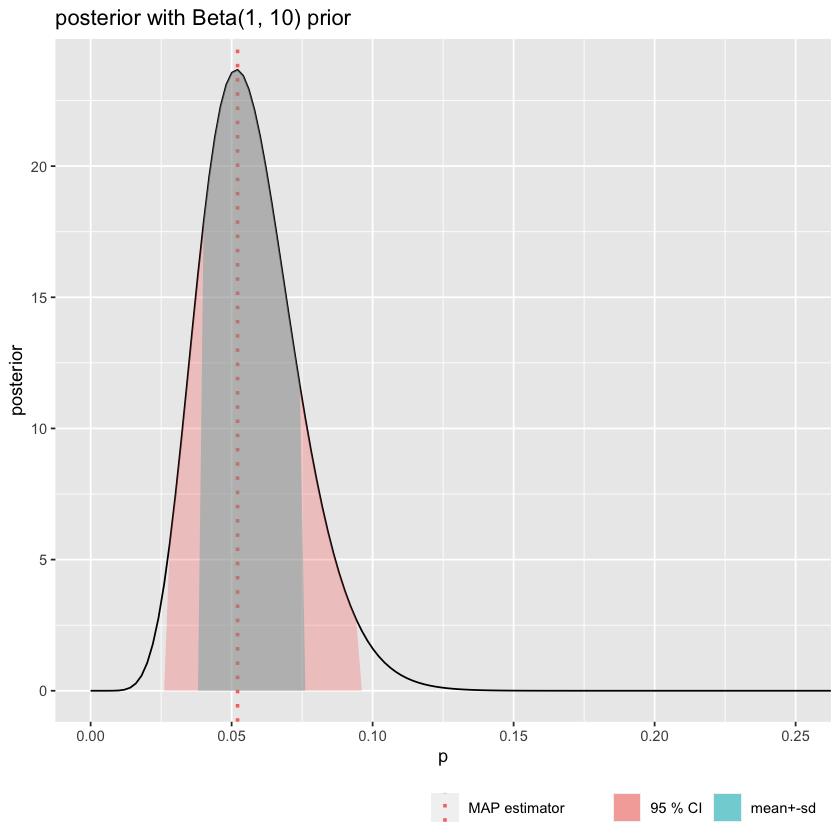

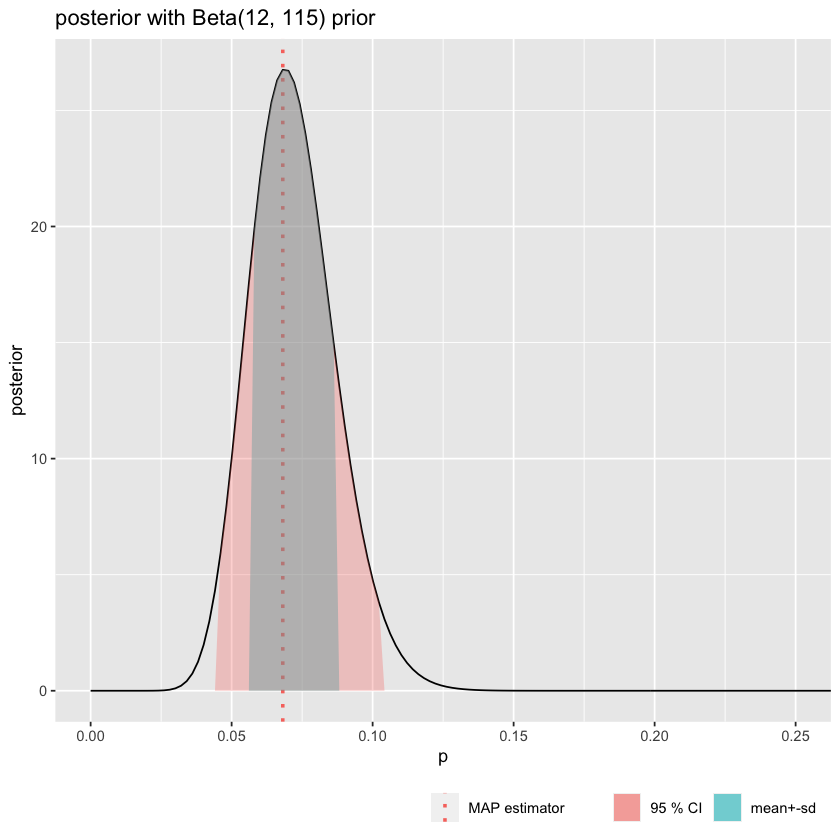

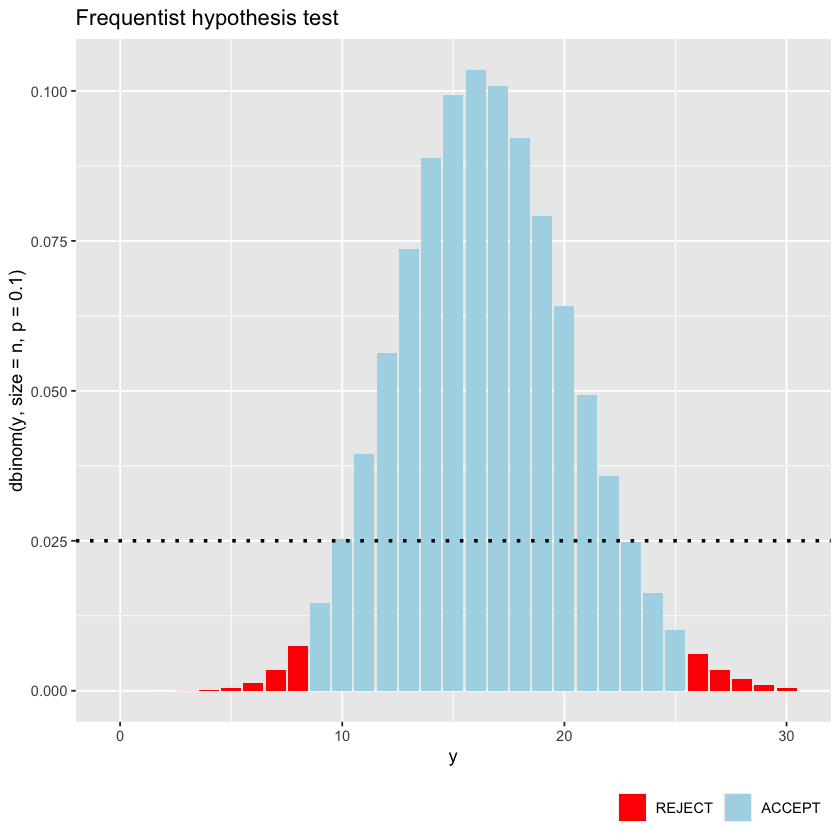

In [45]:
alphas <- c(alpha, alpha+r)
betas <- c(beta, beta+n-r)

n<-165
r<-9 
p_frequentist <- 9/165


for (i in 1:2) {
    
alpha <- alphas[i]
 
beta <- betas[i]
    
alpha1 <- r+alpha
beta1 <- n-r+beta
mean <- alpha1 / (alpha1 + beta1)
var <- (alpha1*beta1)/((alpha1+beta1)^2*(alpha1+beta1+1))
sd <- sqrt(var)



p <- seq(0,1,len=500)
likelihood <- dbinom(x=r, p=p, size=n)
prior <- dbeta(x=p, shape1=alpha, shape2=beta)
posterior <- dbeta(x=p, shape1=alpha1, shape2=beta1)
map <- p[which.max(posterior)]
lower<-qbeta(p=0.025, shape1=alpha1, shape2=beta1)
upper<-qbeta(p=0.975, shape1=alpha1, shape2=beta1)





plot3 <- ggplot()+
geom_line(aes(x=p, y=posterior))+
geom_vline(aes(xintercept = map, color='MAP estimator'), linetype="dotted", size=1)+
geom_area(aes( x =p, y=ifelse(p>mean-sd & p< mean+sd, posterior, 0), fill='mean+-sd'), alpha=0.4)+
geom_area(aes( x =p, y=ifelse(p>lower & p< upper, posterior, 0), fill='95 % CI'), alpha=0.3)+
labs(color='', fill='', title=sprintf('posterior with Beta(%.f, %.f) prior' , alpha, beta))+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
coord_cartesian(xlim=c(0,0.25))

print(plot3)
    
    
}




y <- seq(0, 30, len=31)
plot4 <- ggplot()+geom_bar(aes(x=y, y=dbinom(y, size=n, p=0.1), fill=(y>=9 & y<=25)), stat = "identity")+
geom_hline(aes(yintercept = 0.025), linetype="dotted", size=1)+
labs(fill='', title='Frequentist hypothesis test')+
scale_fill_manual(values = c('red', 'lightblue'), labels=c('REJECT', 'ACCEPT'))  +
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))

plot4



For a Beta(1, 10) prior, we get that p=0.1 falls in the rejection region for $\alpha=0.05$ for a two-sided test. 


On the other hand, for a Beta(12, 115) prior p=0.1 is accepted at $\alpha=0.05$ for a two-sided test. 


Using a frequentist approach, y=11 is accepted at $\alpha=0.05$ for a two-sided test.